<h1>Sales EDA

Combining the sales data from the different sources and performing EDA on the combined data.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Code to Join the sheets to one dataframe

In [78]:
# Python
import pandas as pd
import os

# Directory where the Excel files are located
directory = 'datasets/Sales'

# List to store the dataframes
dfs = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".xlsx") or filename.endswith(".xls"):
        # Construct the full file path
        file_path = os.path.join(directory, filename)
        
        # Read the Excel file
        df = pd.read_excel(file_path)
        
        # Select the required columns
        df = df[['DATE', 'PRODUCT CODE', 'DESCRIPTION', 'QTY']]
        
        # Append the dataframe to the list
        dfs.append(df)

# Concatenate all dataframes
final_df = pd.concat(dfs, ignore_index=True)

In [79]:
final_df

,DATE,PRODUCT CODE,DESCRIPTION,QTY
0,02/01/2022,12978,AMBEWELA SET YOGURT 80ML,6.0
1,01/01/2022,12978,AMBEWELA SET YOGURT 80ML,6.0
2,01/01/2022,12978,AMBEWELA SET YOGURT 80ML,1.0
3,01/01/2022,12978,AMBEWELA SET YOGURT 80ML,6.0
4,02/01/2022,12978,AMBEWELA SET YOGURT 80ML,10.0
...,...,...,...,...
34627,09/10/2023,10415,HIGHLAND YOGHURT 80ML,12.0
34628,09/10/2023,10415,HIGHLAND YOGHURT 80ML,9.0
34629,09/10/2023,10415,HIGHLAND YOGHURT 80ML,13.0
34630,09/10/2023,10415,HIGHLAND YOGHURT 80ML,7.0


<h1><strong>EDA on the Sales Dataset<strong><h1>

<h2>1. Using .describe()</h2>

In [80]:
print(final_df.describe())# get a quick summary on the dataset from the quanitity values

       PRODUCT CODE           QTY
count  34632.000000  34632.000000
mean   14353.275930     11.285710
std     7934.239623     40.150993
min    10198.000000  -2160.000000
25%    10415.000000      1.000000
50%    10444.000000      3.000000
75%    12978.000000      8.000000
max    57096.000000   2875.000000


A total of 34632 products were sold. <br>
Product code 12974 has been the most frequently purchased products while 25% of the products purchased are of code 10415. Lets look into more detail

<h2>2. Check for missing values</h2>

In [81]:
missingValues = final_df.isna().sum().sum()
print(f'Total number of missing values: {missingValues}')

zero_quantity = final_df['QTY'] == 0
empty_description = final_df['DESCRIPTION'].isna()

total = (zero_quantity & empty_description).sum()
print(f'Total number of rows with zero quantity and empty description: {total}')

Total number of missing values: 0
Total number of rows with zero quantity and empty description: 0


There are no rows with missing values in the dataset. However, there are some negative values in the QTY column.

<h2>3. Convert the columns to correct date types</h2>

In [82]:
import pandas as pd


final_df['DATE'] = pd.to_datetime(final_df['DATE'], format='%d/%m/%Y')  # split the function to correct format

final_df['Day'] = final_df['DATE'].dt.day
final_df['Month'] = final_df['DATE'].dt.month
final_df['Year'] = final_df['DATE'].dt.year
final_df['DayOfWeek'] = final_df['DATE'].dt.day_name()

df

,DATE,PRODUCT CODE,DESCRIPTION,QTY
0,26/01/2022,10415,HIGHLAND YOGHURT 80ML,148
1,27/01/2022,10415,HIGHLAND YOGHURT 80ML,30
2,27/01/2022,10415,HIGHLAND YOGHURT 80ML,6
3,25/01/2022,10415,HIGHLAND YOGHURT 80ML,94
4,25/01/2022,10415,HIGHLAND YOGHURT 80ML,137
...,...,...,...,...
5776,09/10/2023,10415,HIGHLAND YOGHURT 80ML,12
5777,09/10/2023,10415,HIGHLAND YOGHURT 80ML,9
5778,09/10/2023,10415,HIGHLAND YOGHURT 80ML,13
5779,09/10/2023,10415,HIGHLAND YOGHURT 80ML,7


added new features such as splitting the date column to day/month/year and the dayoftheweek

In [83]:
final_df=final_df.drop(["PRODUCT CODE"],axis=1)

dropping product code as its not required

In [84]:
description = final_df["DESCRIPTION"]
description.nunique()## to get the number of different products

32

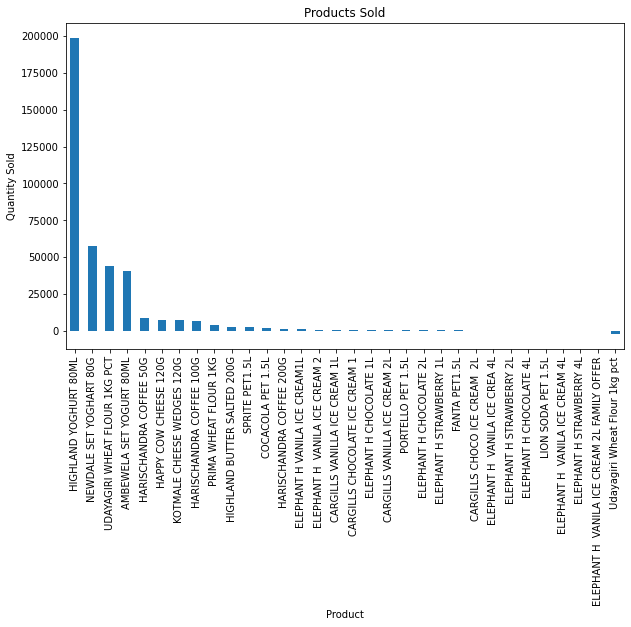

In [85]:

top_products = final_df.groupby('DESCRIPTION')['QTY'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title('Products Sold')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.show()

Highland youghurt has been sold frequently. there are spelling mistakes in the dataset we have to fix this

<h2>4. Cleaning data </h2>

<AxesSubplot:>

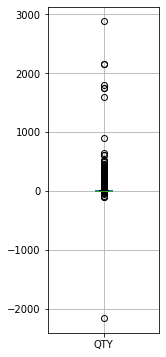

In [86]:
negative_values = final_df[(final_df['QTY'] <= 0)]
final_df.boxplot(column=['QTY'], figsize=(2, 6))

There are some outliers and incorrect data for quanitity, some of them are less than zero. and one product is less than -2000

the wheat flour product has -2160 as the quanitiy sold on that day

<AxesSubplot:>

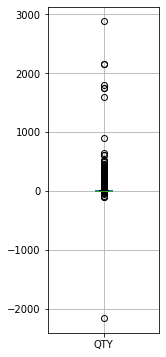

In [87]:
negative_values = final_df[(final_df['QTY'] <= 0)]
final_df.boxplot(column=['QTY'], figsize=(2, 6))

Now the QTY column is fixed, have to fix the descriptions

In [88]:
# before doing that we gotto split the description based on the product name and quantity
final_df[['Product Name', 'Product Quantity']] = final_df['DESCRIPTION'].str.rsplit(' ', n=1, expand=True)
final_df["Date"] =final_df["DATE"]
final_df["Units sold"]=final_df["QTY"]
final_df.drop(["DATE","DESCRIPTION","QTY"],axis=1,inplace=True)
final_df

,Day,Month,Year,DayOfWeek,Product Name,Product Quantity,Date,Units sold
0,2,1,2022,Sunday,AMBEWELA SET YOGURT,80ML,2022-01-02,6.0
1,1,1,2022,Saturday,AMBEWELA SET YOGURT,80ML,2022-01-01,6.0
2,1,1,2022,Saturday,AMBEWELA SET YOGURT,80ML,2022-01-01,1.0
3,1,1,2022,Saturday,AMBEWELA SET YOGURT,80ML,2022-01-01,6.0
4,2,1,2022,Sunday,AMBEWELA SET YOGURT,80ML,2022-01-02,10.0
...,...,...,...,...,...,...,...,...
34627,9,10,2023,Monday,HIGHLAND YOGHURT,80ML,2023-10-09,12.0
34628,9,10,2023,Monday,HIGHLAND YOGHURT,80ML,2023-10-09,9.0
34629,9,10,2023,Monday,HIGHLAND YOGHURT,80ML,2023-10-09,13.0
34630,9,10,2023,Monday,HIGHLAND YOGHURT,80ML,2023-10-09,7.0


Convert the units sold to an integer and rearrange the columns

In [94]:
final_df["Units sold"] = final_df["Units sold"].astype(int)
final_df = final_df[["Date", "Product Name", "Product Quantity", "Units sold", "Day", "Month", "Year", "DayOfWeek"]]
final_df

,Date,Product Name,Product Quantity,Units sold,Day,Month,Year,DayOfWeek
0,2022-01-02,AMBEWELA SET YOGURT,80ML,6,2,1,2022,Sunday
1,2022-01-01,AMBEWELA SET YOGURT,80ML,6,1,1,2022,Saturday
2,2022-01-01,AMBEWELA SET YOGURT,80ML,1,1,1,2022,Saturday
3,2022-01-01,AMBEWELA SET YOGURT,80ML,6,1,1,2022,Saturday
4,2022-01-02,AMBEWELA SET YOGURT,80ML,10,2,1,2022,Sunday
...,...,...,...,...,...,...,...,...
34627,2023-10-09,HIGHLAND YOGHURT,80ML,12,9,10,2023,Monday
34628,2023-10-09,HIGHLAND YOGHURT,80ML,9,9,10,2023,Monday
34629,2023-10-09,HIGHLAND YOGHURT,80ML,13,9,10,2023,Monday
34630,2023-10-09,HIGHLAND YOGHURT,80ML,7,9,10,2023,Monday


Convert the product quanitity to correct metrics ex L,ML,G,KG